# Assignment 3

Student name : Balasubramanian A.R

Batch : M.Sc Computer science second year

In this assignment, we perform linear regression on the advertising dataset given in the book 'An Introduction to Statistical Learning'. 

In [372]:
import sklearn
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [373]:
udf = pd.read_csv("Advertising.csv", delimiter = ",", names=['index','TV','radio','newspaper','sales'])
df = (udf.drop(columns = ['index']))[1:] #Dropping title and indices

## Comparison between TV and sales

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 06 Feb 2019   Prob (F-statistic):           1.47e-42
Time:                        21:30:14   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

Text(0.5, 1.0, 'Plot of TV vs Sales')

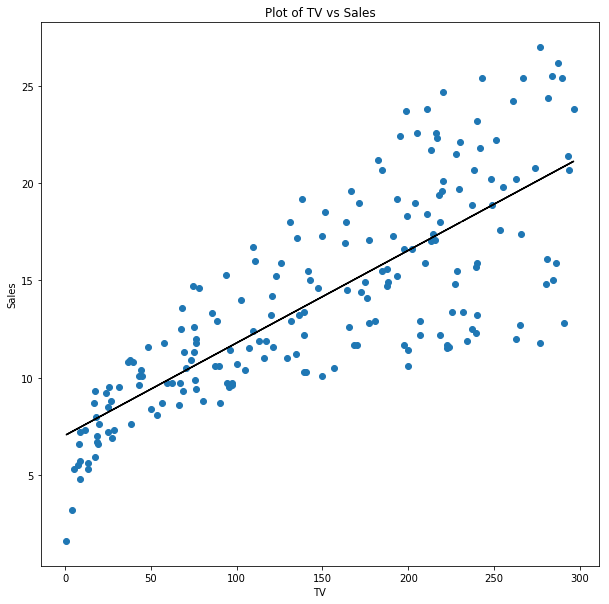

In [374]:
#Splitting the data
tv = df.drop(['radio','newspaper','sales'],axis = 1).astype(float)
sales = df.drop(['TV', 'radio', 'newspaper'],axis = 1).astype(float)
n = len(tv)

tv_inp = sm.add_constant(tv) #Adding a constant to the model
model = sm.OLS(sales,tv_inp) #Initializing the model
linreg = model.fit() #Fitting the model
print(linreg.summary()) #Summary of the model

pred = linreg.predict(tv_inp)


#Plotting data
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
plt.scatter(tv,sales)
plt.plot(tv,pred,color = 'black')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Plot of TV vs Sales')

### Analysis

The above table and plot gives us a summary of the model when restricted to advertisment expenditures in TV. 
We notice that the p-value for both the intercept and the slope are very small. Hence, we can reject the null hypothesis, i.e we can conclude that the sales of the product is associated with the amount of money spent on TV advertisments. 

The $R^2$ value and $F$-statistic computed by our analysis matches that of the computation performed in the book.
The $R^2$ value so computed is roughly $0.61$ which indicates that a good fraction (roughly two-third) of variability in the data has been explained by the above model. 

The $95\%$ confidence interval for the intercept is roughly $[6.130,7.935]$ and the slope is $[0.042,0.053]$ which conforms with the corresponding numbers in the book. Hence on average, an increase of $1000$ dollars on TV advertising will lead to an average increase in sales of somewhere around $42$ to $53$ units.

# Comparison between radio and sales

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Wed, 06 Feb 2019   Prob (F-statistic):           4.35e-19
Time:                        21:30:15   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3116      0.563     16.542      0.0

Text(0.5, 1.0, 'Plot of Radio vs Sales')

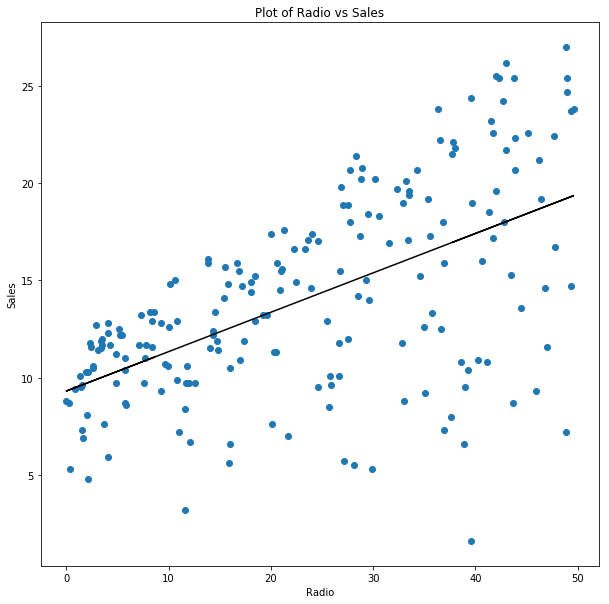

In [375]:
radio = df.drop(['TV','newspaper','sales'],axis = 1).astype(float)
n = len(radio)

radio_inp = sm.add_constant(radio)
radio_model = sm.OLS(sales,radio_inp)
linreg = radio_model.fit() 
print(linreg.summary()) 

pred = linreg.predict(radio_inp)

plt.scatter(radio,sales)
plt.plot(radio,pred,color = 'black')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Plot of Radio vs Sales')

### Analysis

We notice that the $p$-score for both the intercept and the slope term is very small. Once again, this leads us to reject the null hypothesis and conclude that the amount of sales depends on the money spent on radio advertising. The $95\%$ confidence intervals for the intercept and the slope term are $[8.202,10.422]$ and $[0.162,0.243]$. This implies that on average, an increase in $1000$ dollars of radio advertising will give us an average increase of $162$ to $243$ units. Notice that this number is almost $4$ to $5$ times more than what was obtained for TV advertising.

## Comparison between newspaper and sales

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Wed, 06 Feb 2019   Prob (F-statistic):            0.00115
Time:                        21:30:15   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3514      0.621     19.876      0.0

Text(0.5, 1.0, 'Plot of News vs Sales')

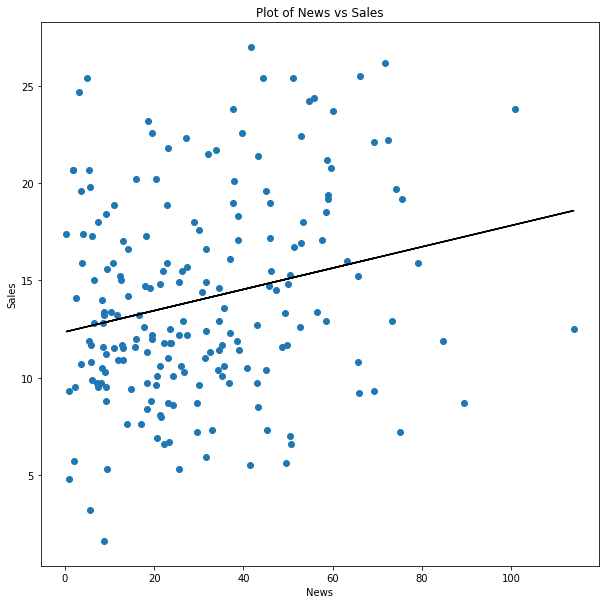

In [376]:
news = df.drop(['TV','radio','sales'],axis = 1).astype(float)
n = len(news)

news_inp = sm.add_constant(news)
news_model = sm.OLS(sales,news_inp)
linreg = news_model.fit() 
print(linreg.summary()) 

pred = linreg.predict(news_inp)

plt.scatter(news,sales)
plt.plot(news,pred,color = 'black')
plt.xlabel('News')
plt.ylabel('Sales')
plt.title('Plot of News vs Sales')

# Multiple linear regression

In [382]:
comb = df.drop(['sales'],axis = 1).astype(float)
n = len(comb)

comb_inp = sm.add_constant(comb)
comb_model = sm.OLS(sales,comb_inp)
linreg = comb_model.fit() 
print(linreg.summary()) 

pred = linreg.predict(comb_inp)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 06 Feb 2019   Prob (F-statistic):           1.58e-96
Time:                        21:30:31   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

### Analysis

We perform an analysis of the multiple regression model. The $F$-statistic for the model is quite high suggesting that we can discard the null hypothesis for this model as well. We notice that the $p$-values of TV and radio remain very small but the $p$-value of newspaper has become significantly high (of the order of 0.86). This suggests that the newspaper feature is not a very relevant feature for the sales of the product. This leads us to drop the newspaper feature and build a model with only TV and radio as features.

# TV and Radio model

In [378]:
tvradio = df.drop(['newspaper','sales'],axis = 1).astype(float)
n = len(tvradio)

tvradio_inp = sm.add_constant(tvradio)
tvradio_model = sm.OLS(sales,tvradio_inp)
linreg = tvradio_model.fit() 
print(linreg.summary()) 

pred = np.array(linreg.fittedvalues)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 06 Feb 2019   Prob (F-statistic):           4.83e-98
Time:                        21:30:15   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.0

### Analysis

We notice that dropping the newspaper feature made very little changes to the $R^2$ score. This implies that the inclusion of newspaper feature does not lead to better results and might in fact lead to poorer estimates in the future because of overfitting. The confidence intervals for both TV and radio also remain roughly the same.

# Interaction between TV and Radio

As suggested in the book, we add an $\textit{interaction}$ term between the TV and radio features. 

In [379]:
int_model = smf.ols(formula='sales ~ TV * radio',data=tvradio)
linreg = int_model.fit() 
print(linreg.summary()) 

pred = np.array(linreg.fittedvalues)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Wed, 06 Feb 2019   Prob (F-statistic):          6.68e-146
Time:                        21:30:15   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.0

### Analysis

The addition of interaction significantly improves the $R^2$ score of the model. Also the $p$-value of the combined term TV:radio is close to $0$ suggesting that indeed this joint feature is a significant one affecting the nature of the sales. The values obtained by us are similar to the values obtained in the book.

## Residual plots

For the above mentioned interaction model, we draw the residual plot.

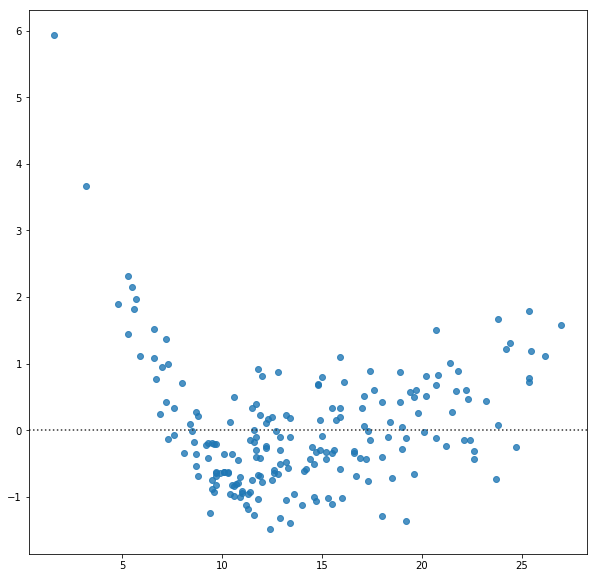

In [380]:
import seaborn as sns
sns.residplot(sales,pred)

The data exhibits a curve-like structure which strongly suggests that the dependencies of sales on the features might be non-linear. To take this into account we also consider a quadratic fit to the model.

# Quadratic regression

We consider a new feature $TV^2$ for performing quadratic regression on the data. (We left out the feature $radio^2$ because its $p$-score was high).

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     3432.
Date:                Wed, 06 Feb 2019   Prob (F-statistic):          1.79e-179
Time:                        21:30:16   Log-Likelihood:                -186.86
No. Observations:                 200   AIC:                             383.7
Df Residuals:                     195   BIC:                             400.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.1371      0.193     

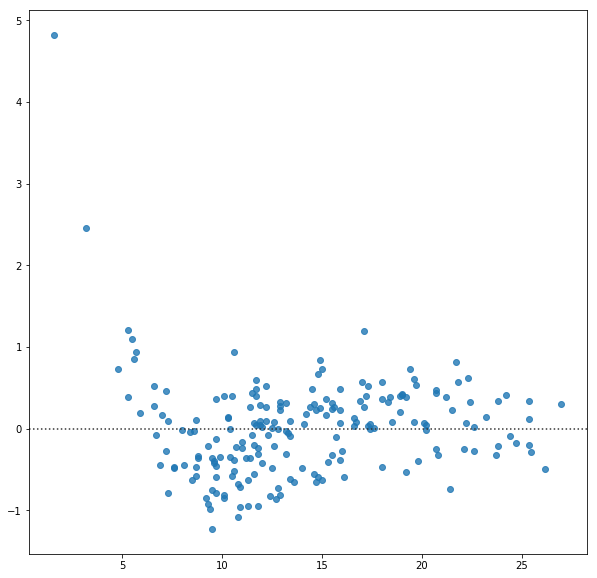

In [381]:
qua_model = smf.ols(formula='sales ~ TV * radio + np.power(TV,2)',data=tvradio)
quareg = qua_model.fit() 
print(quareg.summary()) 

pred = np.array(quareg.fittedvalues)
sns.residplot(sales,pred)

The residual plot of the quadratic model exhibits a much lesser pattern which indicates thatr the quadratic model fits better for the dataset. We can also see that the $F$-statistic has improved in this model.